### Table of Content

---
- [Preparation](#preparation)
 - Load data, Clean Headers, Inspect
 
- [Missing Values](#na)
 - Identify NA 
 - NA distribution, dtypes, fill NAs
 - Correct data format
 
- [Data standadization](#standadization)
- [Data Normalization (centering/scaling)](#normalization)
- [Binning](#binning)
- [Indicator variable](#dummy)

### Libraries

- `pandas`, `numpy`, `matplotlib`, `pyplot`, `missingno`, `seaborn`

---
__Author: Yue Wu__

  # Preparation <a id="preparation"></a>

### Load Data

In [1]:
import pandas as pd

In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url)
df.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


### Clean Headers 

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df.columns=headers
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


### Inspect

In [5]:
df.shape

(204, 26)

In [6]:
any(df.isna())

True

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-nul

# Missing Values <a id="na"></a>

### Replace ? with np.nan

In [8]:
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


### NA Distribution

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

<Figure size 2500x1000 with 2 Axes>

### NA Counts

In [10]:
na = df.isna().sum().sort_values(ascending=False)[0:10]
na

normalized-losses    40
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
dtype: int64

### NA Dtypes

In [11]:
df[na.index[0:7]].dtypes

normalized-losses    object
price                object
stroke               object
bore                 object
peak-rpm             object
horsepower           object
num-of-doors         object
dtype: object

In [12]:
df[na.index[0:7]].describe()

,normalized-losses,price,stroke,bore,peak-rpm,horsepower,num-of-doors
count,164,200,200,200,202,202,202
unique,51,185,36,38,23,59,2
top,161,18150,3.40,3.62,5500,68,four
freq,11,2,20,23,37,19,114


### Fill NAs


### Replace by mean:

- normalized-losses: 41 missing
- stroke: 4 missing
- bore: 4 missing
- horsepower: 2 missing
- peak-rpm: 2 missing

In [13]:
for col in df[['normalized-losses','bore','stroke','horsepower','peak-rpm']].columns:
    x = df[col].astype('float').mean()
    df[col].replace(np.nan, x, inplace=True)

In [14]:
df.isna().sum().sort_values(ascending=False)[0:10]

price                4
num-of-doors         2
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
dtype: int64

### Replace by Frequency

- num-of-doors: 2 missing

In [15]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [16]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

### Drop Row

- price: 4 missing, target variable

In [17]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.isna().sum().sort_values(ascending=False)[0:10]

price                0
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
dtype: int64

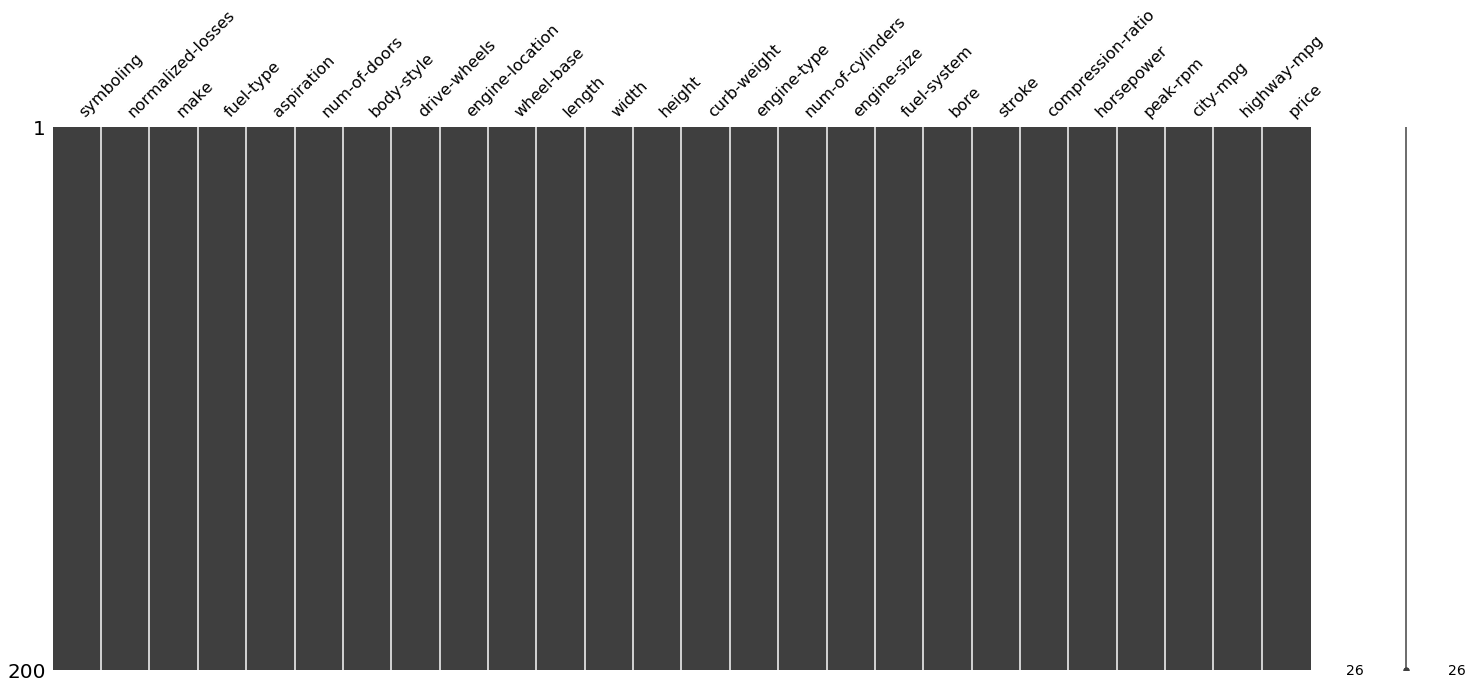

In [19]:
msno.matrix(df) # double check

#### Missing data cleaned.

### Clean Data Format
 
- `astype`

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [22]:
df[["bore",'stroke',"normalized-losses","price","peak-rpm"]].dtypes

bore                 float64
stroke               float64
normalized-losses      int64
price                float64
peak-rpm             float64
dtype: object

# Data Standardization <a id="standardization"></a>

Convert mpg to L/100km: `L/100km = 235 / mpg`


In [23]:
df['city-L/100km'] = 235/df["city-mpg"]
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421


In [24]:
df['highway-L/100km']= 235/df["highway-mpg"]
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


# Data Normalization <a id="normalization"></a>

Scale variables to the same range with simple feature scaling.

In [25]:
plt.style.use('seaborn-talk')

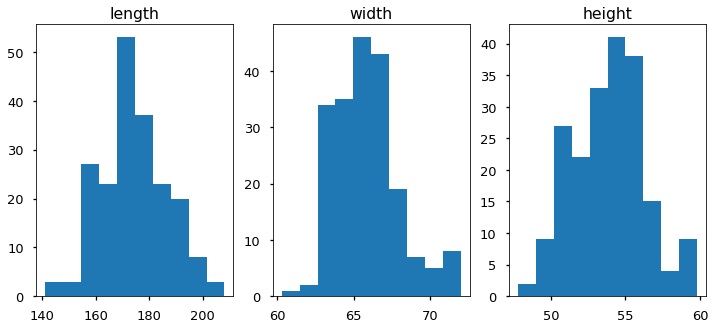

In [26]:
shape = df[['length','width','height']].copy()

fig,ax=plt.subplots(1,3,figsize=(12,5))

for n, col in enumerate(shape):
    ax[n].hist(df[col])
    ax[n].set_title(col)

In [27]:
for idx, col in shape.iteritems(): 
    shape.loc[idx]=shape[idx]/col.max()

shape.head()

,length,width,height
0,168.8,64.1,48.8
1,171.2,65.5,52.4
2,176.6,66.2,54.3
3,176.6,66.4,54.3
4,177.3,66.3,53.1


In [28]:
df[['length','width','height']]=shape

# Binning <a id="binning"></a>

- `pd.cut` numerical variable "horsepower" into categories.

In [29]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

<IPython.core.display.Javascript object>

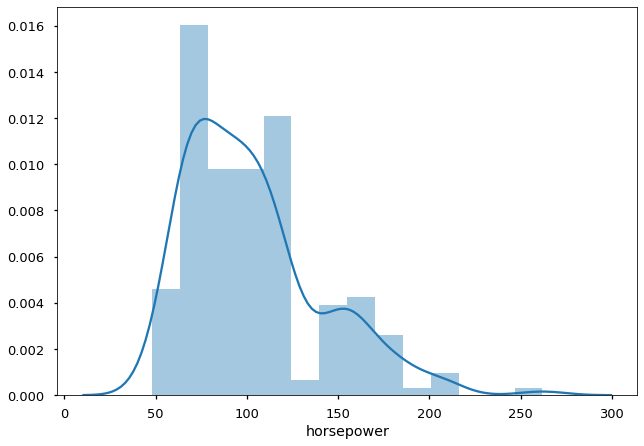

In [30]:
sns.distplot(df['horsepower'], hist=True)

In [31]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low


In [32]:
df['horsepower-binned'].value_counts()

Low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

<IPython.core.display.Javascript object>

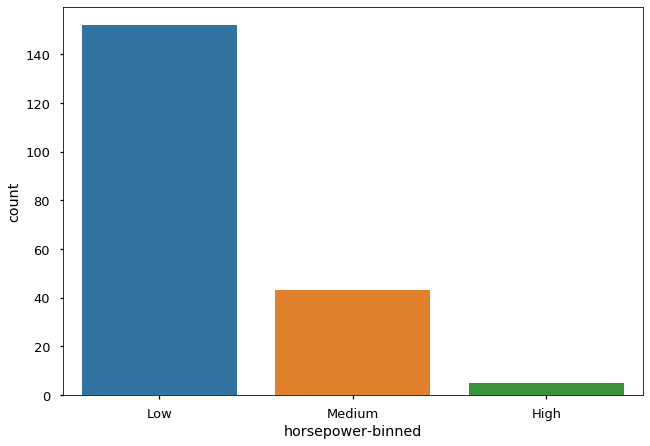

In [33]:
sns.countplot(df["horsepower-binned"])  

# Indicator Variable <a id="dummy"></a>

- `pd.get_dummies` Get dummy variable for "fuel-type" and "aspiration" for future prediction

In [34]:
df['fuel-type'].value_counts()

gas       180
diesel     20
Name: fuel-type, dtype: int64

In [35]:
dummy_1 = pd.get_dummies(df["fuel-type"])
dummy_1.head(2)

,diesel,gas
0,0,1
1,0,1


In [36]:
df = pd.concat([df, dummy_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [37]:
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1


In [38]:
dummy_2=pd.get_dummies(df['aspiration'])
dummy_2.head(2)

,std,turbo
0,1,0
1,1,0


In [39]:
df = pd.concat([df, dummy_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

In [40]:
df.head(2)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0


## Final look

In [41]:
df.head(3)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0


In [42]:
df.isna().any().sum()

0

In [43]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.329981,3.259816,...,5118.259901,25.200000,30.705000,13205.690000,9.937914,8.041663,0.100000,0.900000,0.820000,0.180000
std,1.248557,32.076542,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.268562,0.314177,...,479.240743,6.432487,6.827227,7966.982558,2.539415,1.844764,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,...,5162.995050,24.000000,30.000000,10270.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,138.250000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.582500,3.410000,...,5500.000000,30.000000,34.000000,16500.750000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [44]:
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,197,145,156,91


In [45]:
# df.to_csv('data_cleaned.csv', index=False)

# Well Done : )